In [1]:
# Assignment 2 - USN course IIA1420 Machine Learning and Sensor Technology
# Made by Joel Honkanen on 13/10-2024

In [2]:
# Clean all existing variables (need confirmation)
%reset

In [3]:
%load_ext autoreload
%autoreload 2

# Imports
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('nbagg')

from sklearn.preprocessing import normalize
from sklearn.utils import shuffle

#from plotfunc import plotdata
from sound import Sound
from dataset import Dataset
from calculate import Calculate


%matplotlib widget
# Close all plots to avoid issues
plt.close('all')

In [4]:
# Allow reload of modified imports wihtout restart
%reload_ext autoreload

In [5]:
# Constants
fs = 44100  # Sample rate Hz

In [6]:
# TRAINING DATA PROCESSING 

In [7]:
# Paths to train data folders with sound
good_folder_train = "C:/python/IIA1420/assignment2/IDMT-ISA-ELECTRIC-ENGINE/train_cut/engine1_good/" 
broken_folder_train = "C:/python/IIA1420/assignment2/IDMT-ISA-ELECTRIC-ENGINE/train_cut/engine2_broken/"
heavyload_folder_train = "C:/python/IIA1420/assignment2/IDMT-ISA-ELECTRIC-ENGINE/train_cut/engine3_heavyload/"

In [8]:
# Get list of files in directories
good_files_train = os.listdir(good_folder_train)
broken_files_train = os.listdir(broken_folder_train)
heavyload_files_train = os.listdir(heavyload_folder_train)

good_files_train = sorted(good_files_train, key=lambda item : int(item.split('_')[1].split('.')[0])) 
broken_files_train = sorted(broken_files_train, key=lambda item : int(item.split('_')[1].split('.')[0])) 
heavyload_files_train = sorted(heavyload_files_train, key=lambda item : int(item.split('_')[1].split('.')[0])) 

print('Good files train: ', good_files_train[0:5])
print('Broken files train: ', broken_files_train[0:5])
print('Heavyload files train: ', heavyload_files_train[0:5])

Good files train:  ['pure_0.wav', 'pure_1.wav', 'pure_2.wav', 'pure_3.wav', 'pure_4.wav']
Broken files train:  ['pure_0.wav', 'pure_1.wav', 'pure_2.wav', 'pure_3.wav', 'pure_4.wav']
Heavyload files train:  ['pure_0.wav', 'pure_1.wav', 'pure_2.wav', 'pure_3.wav', 'pure_4.wav']


In [9]:
# Get random number of samples from train set
#random.seed(123)
ngtr = len(good_files_train) # Using full length to get all samples
nbtr = len(broken_files_train)
nhtr = len(heavyload_files_train)

good_files_train_samp = random.sample(good_files_train, ngtr)
broken_files_train_samp = random.sample(broken_files_train, nbtr)
heavyload_files_train_samp = random.sample(heavyload_files_train, nhtr)

print('Good files train sample: ', good_files_train_samp[0:5])
print('Broken files train sample: ', broken_files_train_samp[0:5])
print('Heavyload files train sample: ', heavyload_files_train_samp[0:5])

Good files train sample:  ['pure_1.wav', 'pure_20.wav', 'pure_4.wav', 'pure_54.wav', 'pure_35.wav']
Broken files train sample:  ['pure_59.wav', 'pure_16.wav', 'pure_57.wav', 'pure_77.wav', 'pure_46.wav']
Heavyload files train sample:  ['pure_35.wav', 'pure_37.wav', 'pure_57.wav', 'pure_90.wav', 'pure_17.wav']


In [10]:
# Initiate the dataset objects for training with links to files, folders and labels
# Labels are defined as numbers 1 = good, 2 = broken and 3 = heavy load
good_train = Dataset(good_files_train_samp, good_folder_train, fs, np.ones(ngtr).astype(int))
broken_train = Dataset(broken_files_train_samp, broken_folder_train, fs, 2*np.ones(nbtr).astype(int))
heavyload_train = Dataset(heavyload_files_train_samp, heavyload_folder_train, fs, 3*np.ones(nhtr).astype(int))

In [11]:
# Combine the training data sets and calculate the sound arrays for each file
data_train = Calculate([good_train, broken_train, heavyload_train])

In [12]:
# Use method to get the all sound files and corresponding labels and filenames
# These sound files will be used to generate the additional calculations
train_sound, train_label, train_file = data_train.getsound()

In [13]:
# Look at some samples
sl = slice(200,202, 1)
id = 0
print(train_sound.shape)
print(train_sound[sl])
print(train_label[sl])
print(train_file[sl])


(357, 132300)
[[-3911 -3030 -2929 ...   646   441   771]
 [ 1241   678  -304 ... -2690 -2845 -3367]]
[2 2]
['pure_89.wav', 'pure_2.wav']


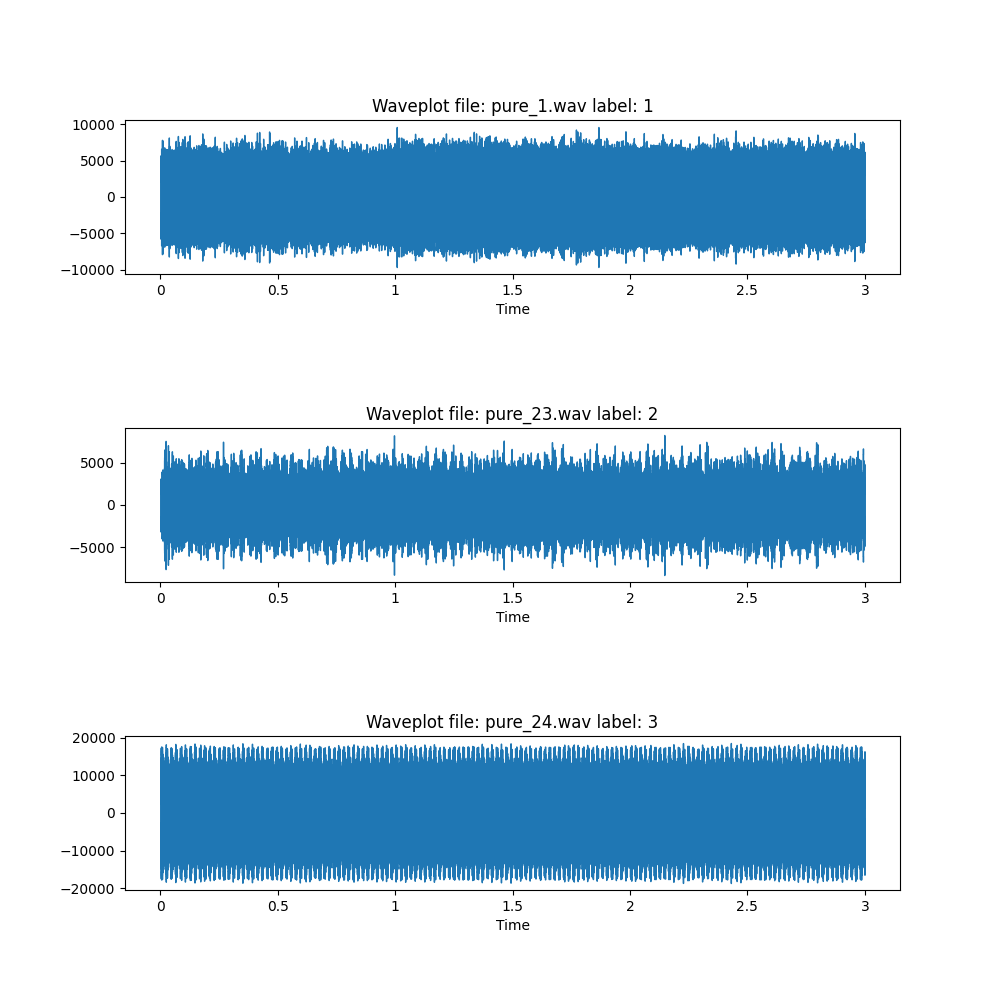

In [14]:
# Plot a single good, broken and heavyload sound
plotdata = [train_sound[0], train_sound[150], train_sound[260]]
plotlabels = [train_label[0], train_label[150], train_label[260]]
plotfiles = [train_file[0], train_file[150], train_file[260]]

Sound.plotmultsound(plotdata, fs, plotfiles, plotlabels )

In [15]:
# Calculate RMS for the sound files
train_rms, train_label, train_file = data_train.calcrms()
print(train_rms.shape)
print(train_rms[sl])
print(train_label[sl])
print(train_file[sl])

(357,)
[1819.64016263 1893.97204848]
[2 2]
['pure_89.wav', 'pure_2.wav']


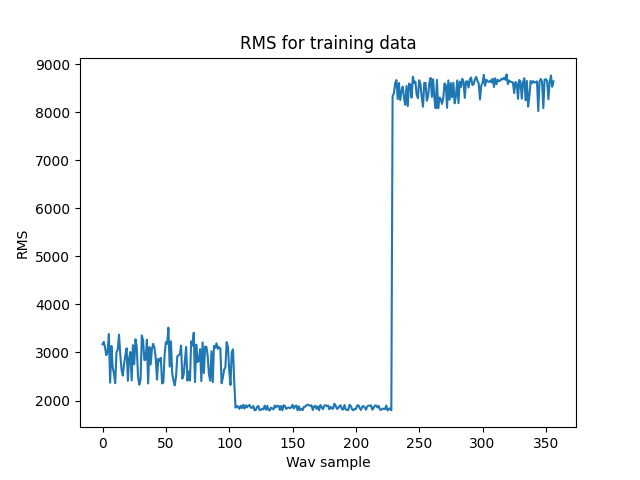

In [16]:
# Plot training data RMS values for each file
Sound.plotsimpleall(train_rms, 'RMS for training data', 'Wav sample', 'RMS')

In [17]:
train_crest, train_label, train_file = data_train.calccrest()
print(train_crest.shape)
print(train_crest[sl])
print(train_label[sl])
print(train_file[sl])

(357,)
[4.8899778  4.59246482]
[2 2]
['pure_89.wav', 'pure_2.wav']


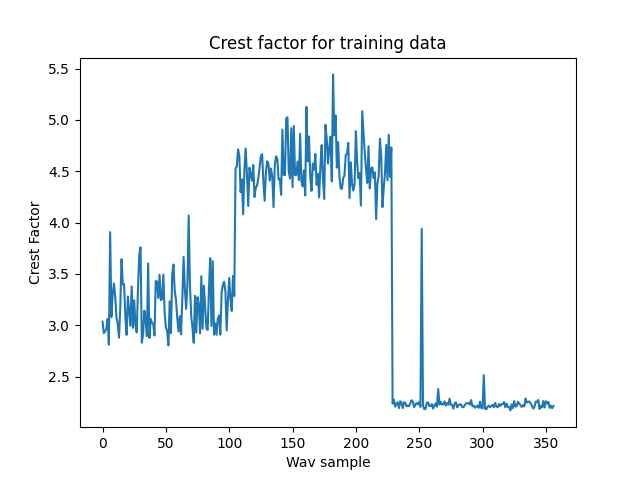

In [18]:
# Plot training data crest factor values for each file
Sound.plotsimpleall(train_crest, 'Crest factor for training data', 'Wav sample', 'Crest Factor')

In [19]:
# Calculate the dft by fft method for all training data samples
train_fft, train_label, train_file = data_train.calcfft()
print(train_fft.shape)
print(train_fft[sl])
print(train_label[sl])
print(train_file[sl])

(357, 132300)
[[  1948.            -0.j         -21509.52796681+12452.05689075j
  -28818.01352645 +7084.42232061j ...   7304.09390692+14482.49296159j
  -28818.01352645 -7084.42232061j -21509.52796681-12452.05689075j]
 [-44850.            -0.j          27882.03717134-10558.36631668j
   14034.55858385 +8181.21387432j ...  26037.61412127 -3316.08766264j
   14034.55858385 -8181.21387432j  27882.03717134+10558.36631668j]]
[2 2]
['pure_89.wav', 'pure_2.wav']


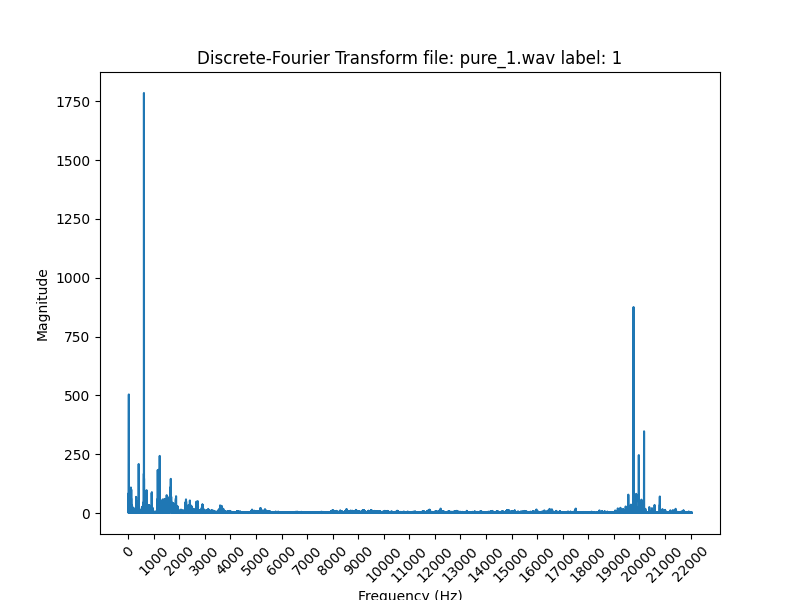

In [20]:
# Plot good motor dft
Sound.plotdft(train_fft[0], fs, train_file[0], train_label[0])

(357, 132300)
[[-2392.05658248-0.j         -2392.05658258-0.05247851j
  -2392.05658289-0.10495703j ... -2392.0565834 +0.15743554j
  -2392.05658289+0.10495703j -2392.05658258+0.05247851j]
 [ 2526.56706307-0.j          2526.5670631 +0.05872527j
   2526.5670632 +0.11745054j ...  2526.56706336-0.17617582j
   2526.5670632 -0.11745054j  2526.5670631 -0.05872527j]]
[2 2]
['pure_89.wav', 'pure_2.wav']


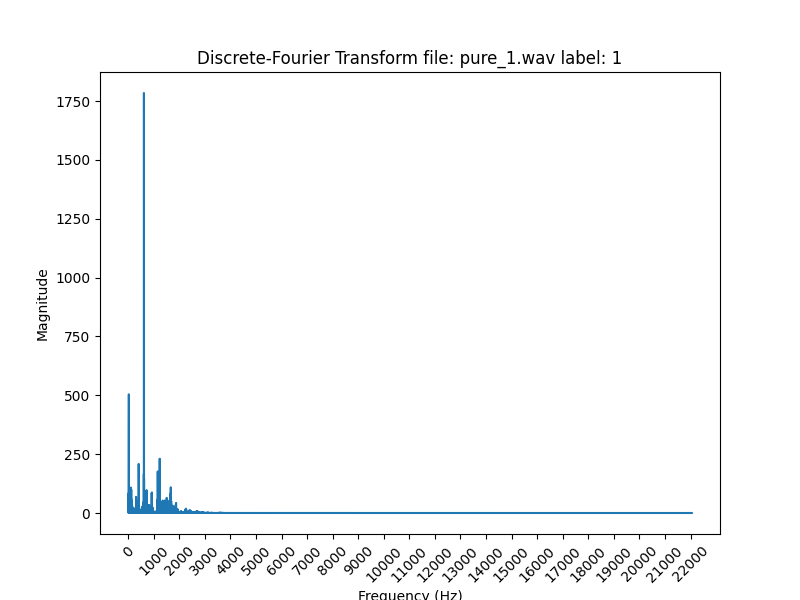

In [21]:
# Calculate the dft by fft method for all training data samples with low pass filter at 2000Hz
train_fft_lp, train_label, train_file = data_train.calcfft(fpar=[fs, 2000, 3], filt=True)
print(train_fft_lp.shape)
print(train_fft_lp[sl])
print(train_label[sl])
print(train_file[sl])
Sound.plotdft(train_fft_lp[0], fs, train_file[0], train_label[0])

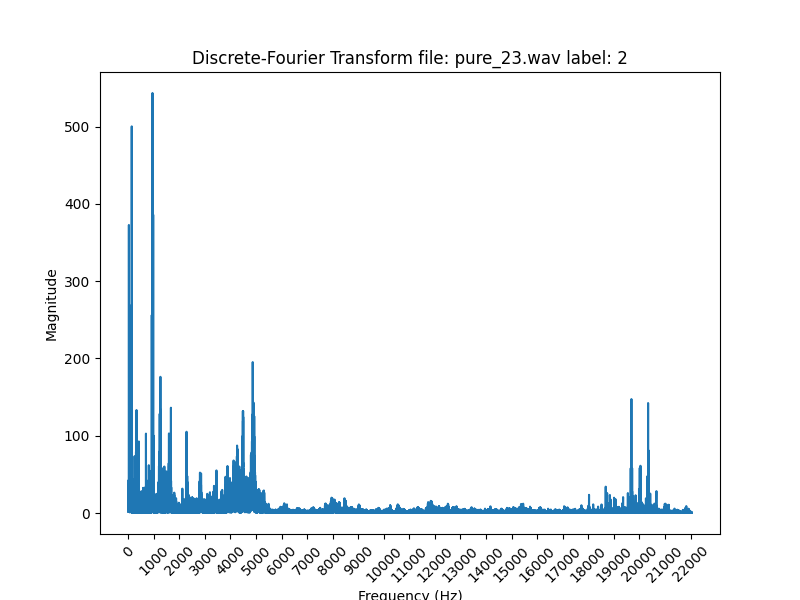

In [22]:
# Plot broken motor dft
Sound.plotdft(train_fft[150], fs, train_file[150], train_label[150])

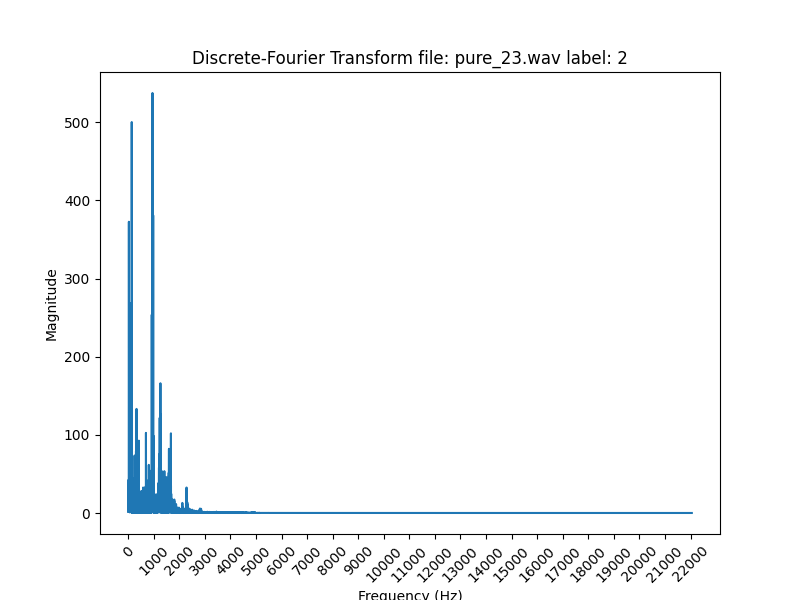

In [23]:
# Other example of filtering
Sound.plotdft(train_fft_lp[150], fs, train_file[150], train_label[150])

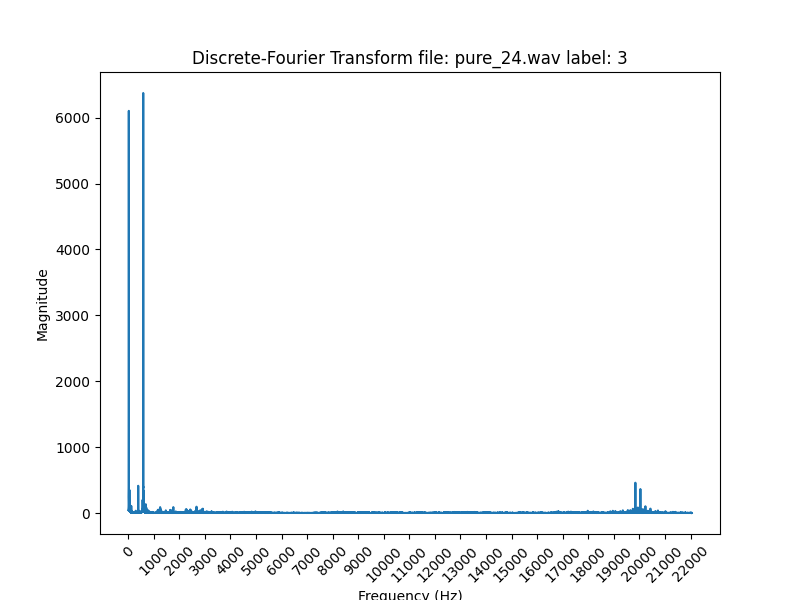

In [24]:
# Plot heavy load motor dft
Sound.plotdft(train_fft[260], fs, train_file[260], train_label[260])

In [25]:
# Calculate mel spectrogram for all training data
train_spec, train_label, train_file = data_train.calcspec()
print(train_spec.shape)
print(train_spec[sl])
print(train_label[sl])
print(train_file[sl])

(357, 128, 130)
[[[-11.562805   -9.919556   -7.1709595 ...  -9.103004  -10.050522
    -5.479828 ]
  [-12.321182  -10.695641   -8.948685  ... -12.101295  -14.408882
    -7.0364685]
  [-16.62352   -14.663376  -10.863342  ...  -9.663422  -12.123077
   -14.007172 ]
  ...
  [-28.908295  -20.240318  -24.417175  ... -23.006989  -19.741577
   -27.589813 ]
  [-35.382507  -23.754616  -28.225143  ... -27.791832  -23.814781
   -30.777557 ]
  [-43.524532  -36.098404  -40.10692   ... -40.774963  -35.650764
   -42.526665 ]]

 [[-11.131378  -12.338928  -10.557922  ... -12.463455  -12.456757
   -10.294601 ]
  [ -8.826195  -12.799812  -11.102478  ... -17.7753    -14.186241
    -9.518913 ]
  [-10.684341  -13.707993  -12.566902  ... -12.442726  -14.874641
    -7.8615723]
  ...
  [-33.501884  -22.37844   -26.526619  ... -24.589432  -22.083183
   -30.89685  ]
  [-37.423164  -25.813896  -29.92382   ... -27.86036   -25.743134
   -35.06172  ]
  [-47.042377  -36.466553  -40.429897  ... -38.985817  -35.349777
  

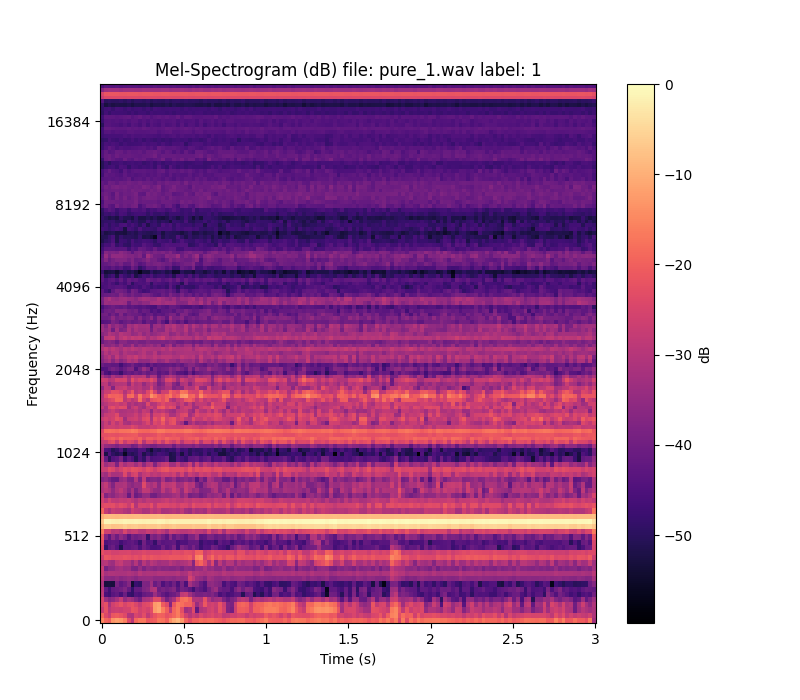

In [26]:
# Plot good load motor mel spectrogram
Sound.plotspec(train_spec[0], fs, 1024, train_file[0], train_label[0])

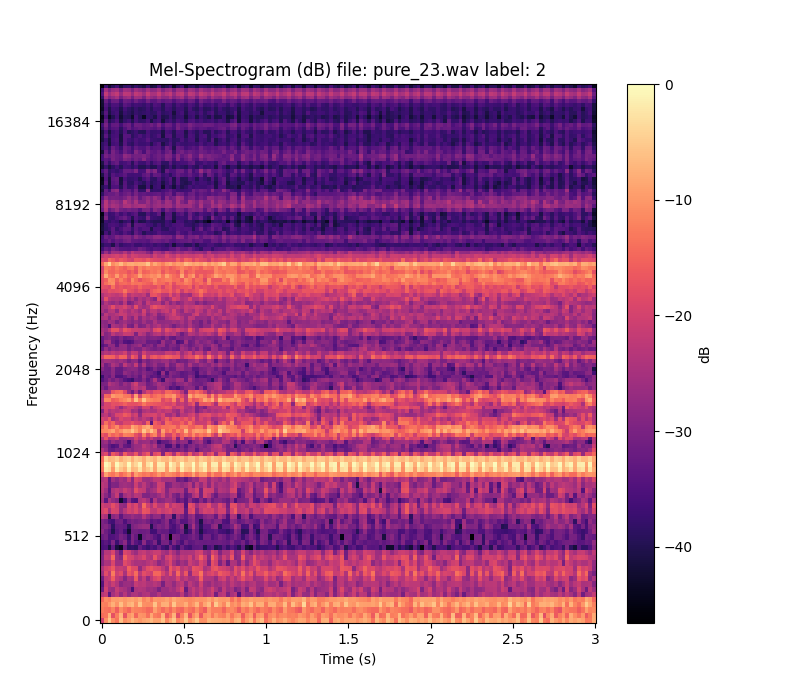

In [27]:
# Plot broken load motor mel spectrogram
Sound.plotspec(train_spec[150], fs, 1024, train_file[150], train_label[150])

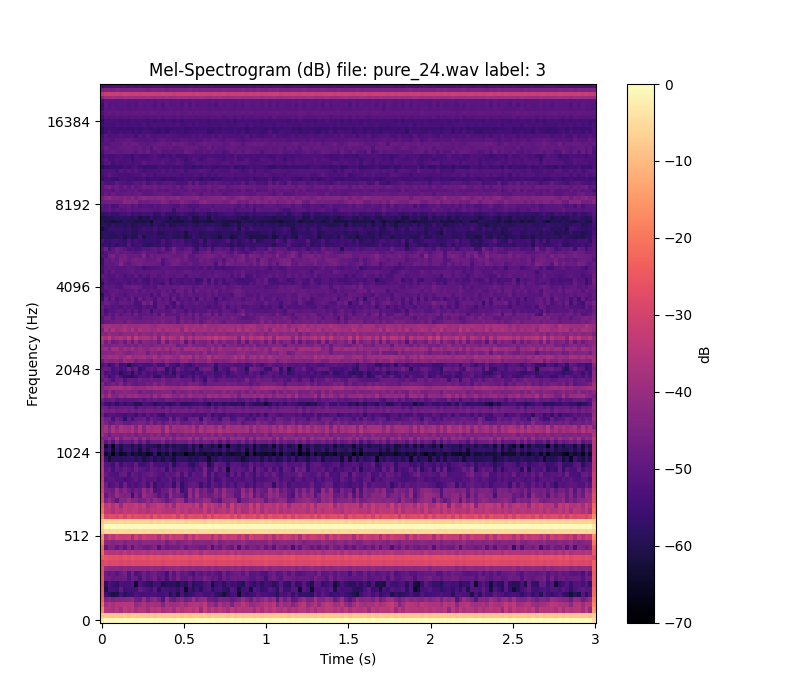

In [28]:
# Plot heavy load motor mel spectrogram
Sound.plotspec(train_spec[260], fs, 1024, train_file[260], train_label[260])

In [29]:
# TEST DATA PROCESSING 

In [30]:
# Paths to test data folders with sound
good_folder_test = "C:/python/IIA1420/assignment2/IDMT-ISA-ELECTRIC-ENGINE/test_cut/engine1_good/" 
broken_folder_test = "C:/python/IIA1420/assignment2/IDMT-ISA-ELECTRIC-ENGINE/test_cut/engine2_broken/"
heavyload_folder_test = "C:/python/IIA1420/assignment2/IDMT-ISA-ELECTRIC-ENGINE/test_cut/engine3_heavyload/"

In [31]:
# Get list of files in directories
good_files_test = os.listdir(good_folder_test)
broken_files_test = os.listdir(broken_folder_test)
heavyload_files_test = os.listdir(heavyload_folder_test)

good_files_test = sorted(good_files_test, key=lambda item : int(item.rsplit('_', 1)[1].split('.')[0])) 
broken_files_test = sorted(broken_files_test, key=lambda item : int(item.rsplit('_', 1)[1].split('.')[0])) 
heavyload_files_test = sorted(heavyload_files_test, key=lambda item : int(item.rsplit('_', 1)[1].split('.')[0])) 

print('Good files test: ', good_files_test[0:5])
print('Broken files test: ', broken_files_test[0:5])
print('Heavyload files test: ', heavyload_files_test[0:5])

Good files test:  ['atmo_high_0.wav', 'atmo_low_0.wav', 'atmo_medium_0.wav', 'stresstest_0.wav', 'talking_1_0.wav']
Broken files test:  ['atmo_high_0.wav', 'atmo_low_0.wav', 'atmo_medium_0.wav', 'stresstest_0.wav', 'talking_1_0.wav']
Heavyload files test:  ['atmo_high_0.wav', 'atmo_low_0.wav', 'atmo_medium_0.wav', 'stresstest_0.wav', 'talking_1_0.wav']


In [32]:
# Get random number of samples from test set
#np.random.seed(123)
#random.seed(123)
all_good_files_test_samp = random.sample(good_files_test, int(len(good_files_test)))
all_broken_files_test_samp = random.sample(broken_files_test, int(len(broken_files_test)))
all_heavyload_files_test_samp = random.sample(heavyload_files_test, int(len(heavyload_files_test)))

good_files_test_samp = all_good_files_test_samp[0:int(len(good_files_test)/3)]
broken_files_test_samp = all_broken_files_test_samp[0:int(len(broken_files_test)/3)]
heavyload_files_test_samp = all_heavyload_files_test_samp[0:int(len(heavyload_files_test)/3)]

# These will be used as a final extra test at the end of notebook
good_files_test_rest = all_good_files_test_samp[int(len(good_files_test_samp)):]
broken_files_test_rest = all_broken_files_test_samp[int(len(broken_files_test_samp)):]
heavyload_files_test_rest = all_heavyload_files_test_samp[int(len(heavyload_files_test_samp)):]

ngte = len(good_files_test_samp)  # shorten the number of samples 
nbte = len(broken_files_test_samp)
nhte = len(heavyload_files_test_samp)

print('Good files test sample: ', good_files_test_samp[0:5])
print('Broken files test sample: ', broken_files_test_samp[0:5])
print('Heavyload files test sample: ', heavyload_files_test_samp[0:5])


Good files test sample:  ['stresstest_2.wav', 'atmo_medium_1.wav', 'talking_3_18.wav', 'atmo_medium_60.wav', 'stresstest_38.wav']
Broken files test sample:  ['stresstest_38.wav', 'whitenoise_low_115.wav', 'stresstest_36.wav', 'talking_4_35.wav', 'whitenoise_low_9.wav']
Heavyload files test sample:  ['atmo_medium_19.wav', 'atmo_medium_46.wav', 'talking_2_28.wav', 'talking_4_68.wav', 'talking_3_69.wav']


In [33]:
# Check so files names split ok
print(len(good_files_test_samp), good_files_test_samp[-3:], good_files_test_samp[222])
print(len(good_files_test_rest), good_files_test_rest[:3], good_files_test_rest[-1])
print(len(all_good_files_test_samp), all_good_files_test_samp[220:225], all_good_files_test_samp[-1])


223 ['whitenoise_low_8.wav', 'talking_1_60.wav', 'talking_3_24.wav'] talking_3_24.wav
446 ['atmo_high_54.wav', 'atmo_low_64.wav', 'atmo_high_16.wav'] stresstest_28.wav
669 ['whitenoise_low_8.wav', 'talking_1_60.wav', 'talking_3_24.wav', 'atmo_high_54.wav', 'atmo_low_64.wav'] stresstest_28.wav


In [34]:
# Define the datasets for testing with links to files, folders and labels
# Labels are defined as numbers 1 = good, 2 = broken and 3 = heavy load
good_test = Dataset(good_files_test_samp, good_folder_test, fs, np.ones(ngte).astype(int))
broken_test = Dataset(broken_files_test_samp, broken_folder_test, fs, 2*np.ones(nbte).astype(int))
heavyload_test = Dataset(heavyload_files_test_samp, heavyload_folder_test, fs, 3*np.ones(nhte).astype(int))

In [35]:
# Combine the testing data sets and calculate sound arrays
data_test = Calculate([good_test, broken_test, heavyload_test])

In [36]:
# Use method to get the all sound files and corresponding labels and filenames
# These sound files will be used to generate the additional calculations
test_sound, test_label, test_files = data_test.getsound()

In [37]:
# Look at some samples 
sl2 = slice(40,42, 1)
id2 = 1
print(test_sound.shape)
print(test_sound[sl2])
print(test_label[sl2])
print(test_files[sl2])

(673, 132300)
[[ 2739  4854  2252 ...   657   474  2517]
 [-1535 -1517 -1854 ... -5044 -3755 -3986]]
[1 1]
['whitenoise_low_29.wav', 'atmo_high_34.wav']


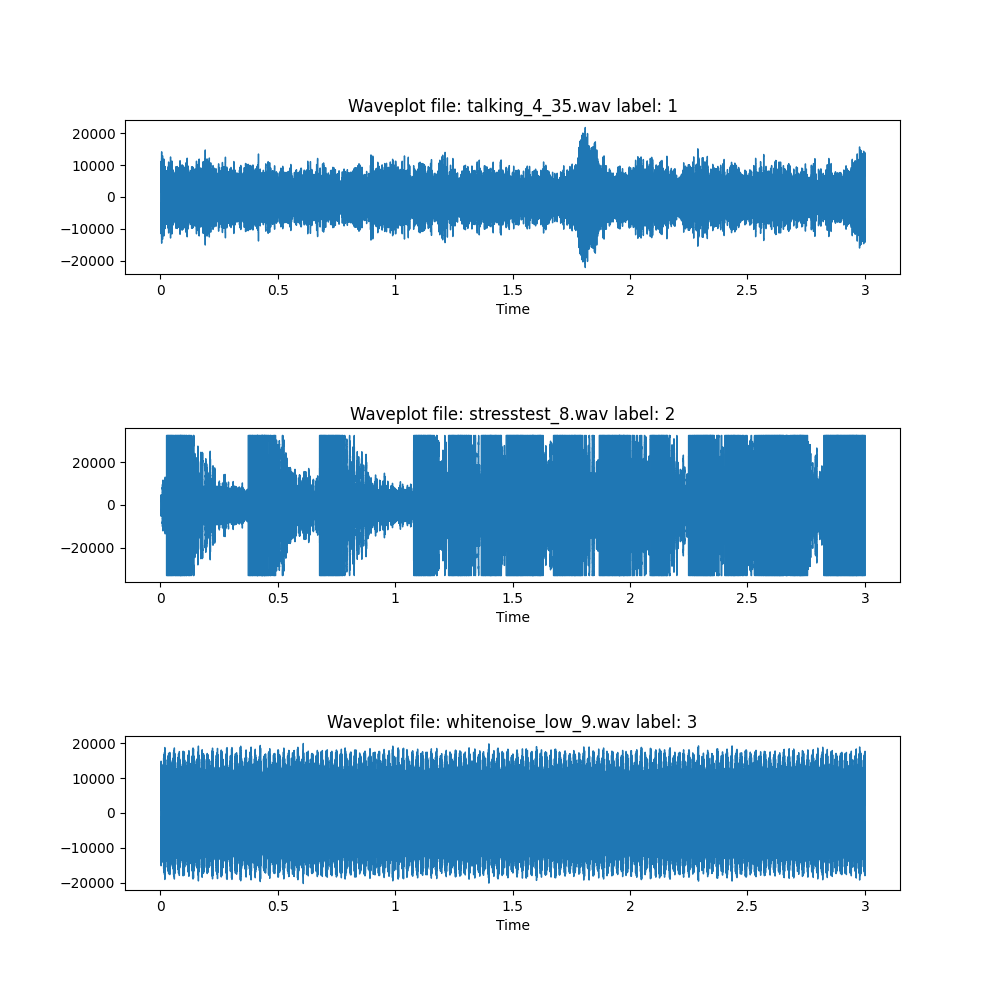

In [38]:
# Plot a single good, broken and heavyload sound
plotdata2 = [test_sound[43], test_sound[331], test_sound[550]]
plotlabels2 = [test_label[43], test_label[331], test_label[550]]
plotfiles2 = [test_files[43], test_files[331], test_files[550]]

Sound.plotmultsound(plotdata2, fs, plotfiles2, plotlabels2 )

In [39]:
# Calculate rms for test data
test_rms, test_label, test_files = data_test.calcrms()
print(test_rms.shape)
print(test_rms[sl2])
print(test_label[sl2])
print(test_files[sl2])

(673,)
[2754.90134397 4060.98120925]
[1 1]
['whitenoise_low_29.wav', 'atmo_high_34.wav']


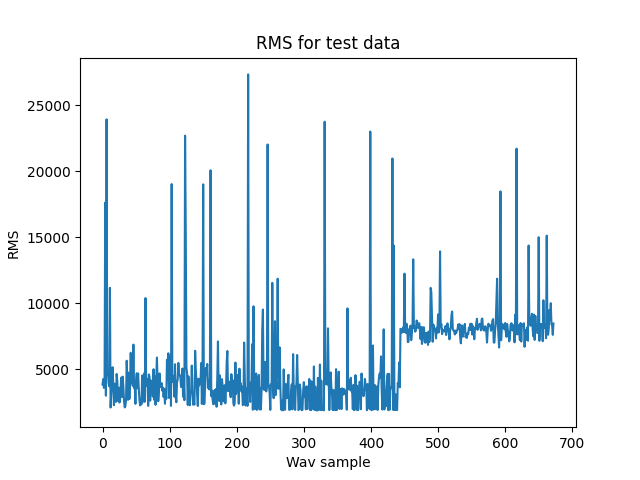

In [40]:
# Plot test data RMS values for each file
Sound.plotsimpleall(test_rms, 'RMS for test data', 'Wav sample', 'RMS')

In [41]:
# Calculate crest factor for test data
test_crest, test_label, test_files = data_test.calccrest()
print(test_crest.shape)
print(test_crest[sl2])
print(test_label[sl2])
print(test_files[sl2])

(673,)
[3.50720363 4.96801117]
[1 1]
['whitenoise_low_29.wav', 'atmo_high_34.wav']


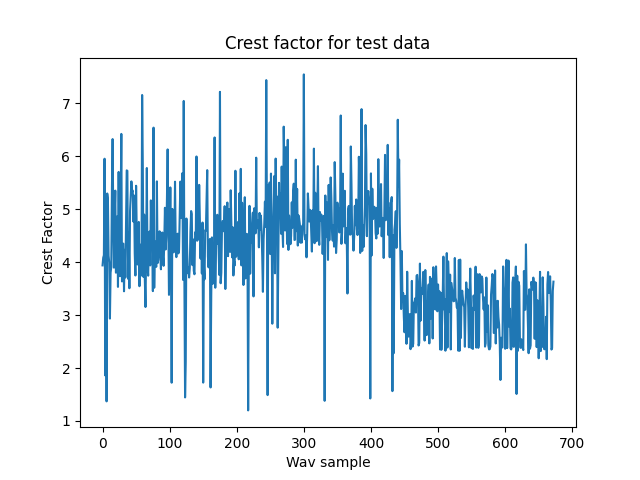

In [42]:
# Plot test data RMS values for each file
Sound.plotsimpleall(test_crest, 'Crest factor for test data', 'Wav sample', 'Crest Factor')

In [43]:
# Calculate dft with fft for test data
test_fft, test_label, test_files = data_test.calcfft()
print(test_fft.shape)
print(test_fft[sl2])
print(test_label[sl2])
print(test_files[sl2])

(673, 132300)
[[ 15701.            -0.j          28037.17779088+28122.7934521j
    -834.48103971-17082.48812068j ... -26225.8135719 +38209.93433925j
    -834.48103971+17082.48812068j  28037.17779088-28122.7934521j ]
 [ 29702.            -0.j          28725.78191963 -9556.4520632j
    6340.67826632  -916.44612778j ...  -2402.92812933 -8061.84764776j
    6340.67826632  +916.44612778j  28725.78191963 +9556.4520632j ]]
[1 1]
['whitenoise_low_29.wav', 'atmo_high_34.wav']


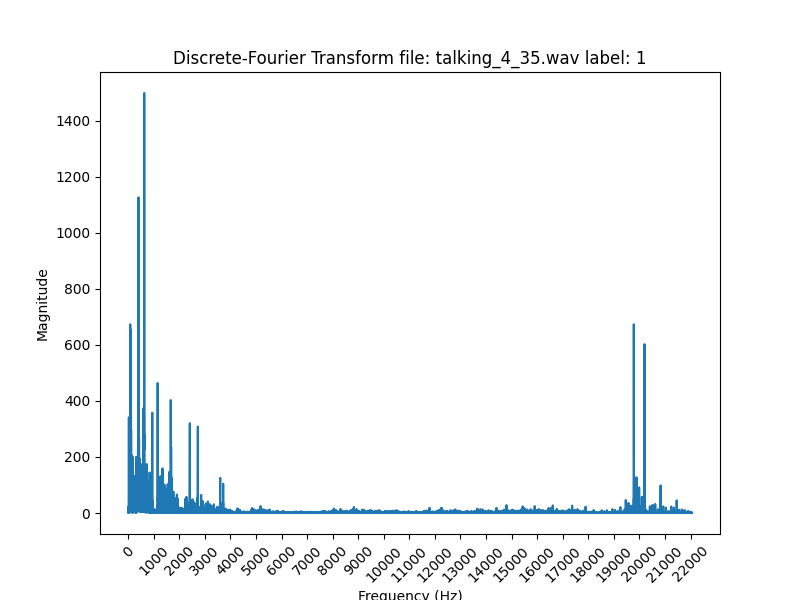

In [44]:
# Plot the results from fft calculation for three cases, first good
Sound.plotdft(test_fft[43], fs, test_files[43], test_label[43])

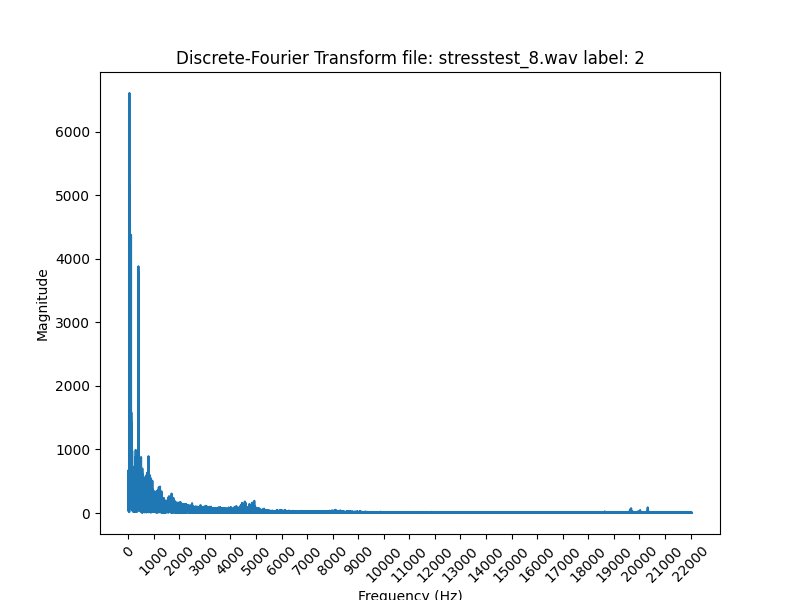

In [45]:
# The second case from broken category
Sound.plotdft(test_fft[331], fs, test_files[331], test_label[331])

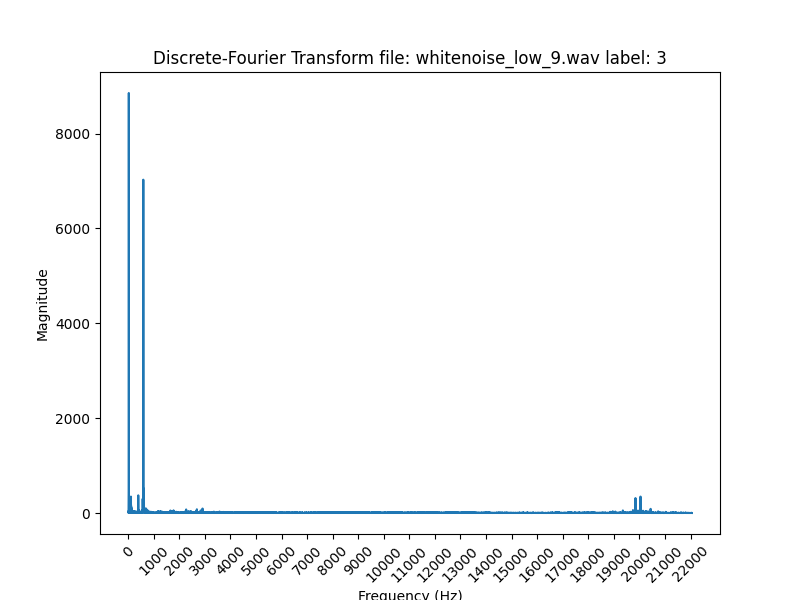

In [46]:
# The third case from heavy load category
Sound.plotdft(test_fft[550], fs, test_files[550], test_label[550])

In [47]:
# Calculate the mel spectrogram for test data
test_spec, test_label, test_files = data_test.calcspec()
print(test_spec.shape)
print(test_spec[sl2])
print(test_label[sl2])
print(test_files[sl2])

(673, 128, 130)
[[[-20.920479  -14.786171  -13.94989   ... -13.823647  -18.582054
   -14.6022415]
  [-14.796577  -15.313927  -15.830002  ... -18.525787  -18.467575
   -15.353088 ]
  [-12.072044   -9.9068985  -8.09156   ... -13.953468   -9.980766
    -9.353661 ]
  ...
  [-23.184776  -19.590248  -19.507446  ... -19.634285  -19.512672
   -20.84539  ]
  [-35.589867  -33.74112   -33.315773  ... -33.49327   -32.955116
   -34.670174 ]
  [-43.448204  -41.78283   -41.31256   ... -41.57554   -41.666733
   -43.22454  ]]

 [[-32.89794   -17.327301  -19.045723  ... -19.034554  -17.948975
   -17.366173 ]
  [-17.301903  -16.584015  -12.679665  ... -12.991615  -16.083977
   -18.155174 ]
  [-12.277809   -9.49839    -6.9435196 ...  -6.273842   -9.31118
   -10.904625 ]
  ...
  [-37.256752  -34.2107    -34.251633  ... -33.448486  -33.84823
   -35.092934 ]
  [-45.116364  -43.204475  -42.82235   ... -43.769684  -43.690002
   -44.721817 ]
  [-50.59822   -48.847527  -48.268433  ... -48.671333  -48.29545
   -5

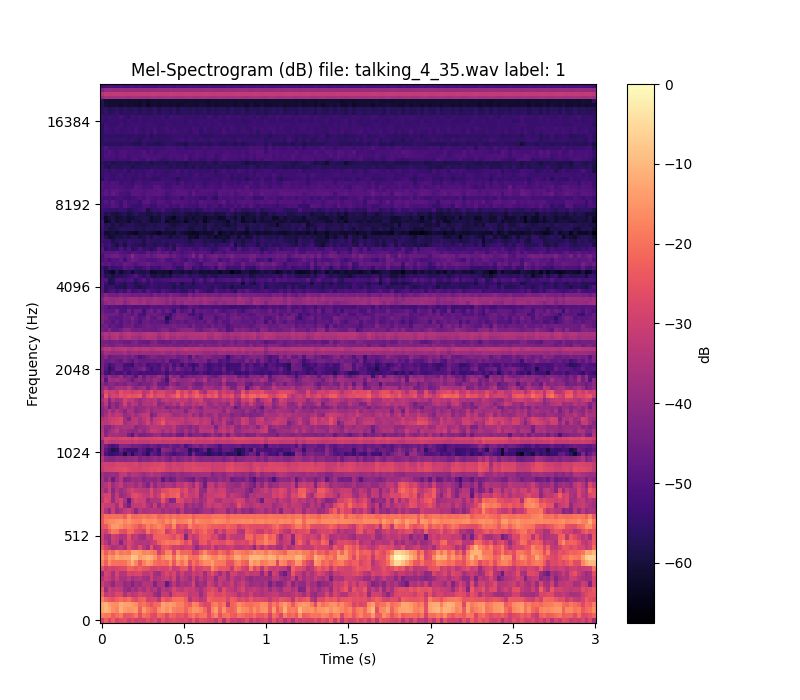

In [48]:
# Plot first mel spectrogram for good case
Sound.plotspec(test_spec[43], fs, 1024, test_files[43], test_label[43])

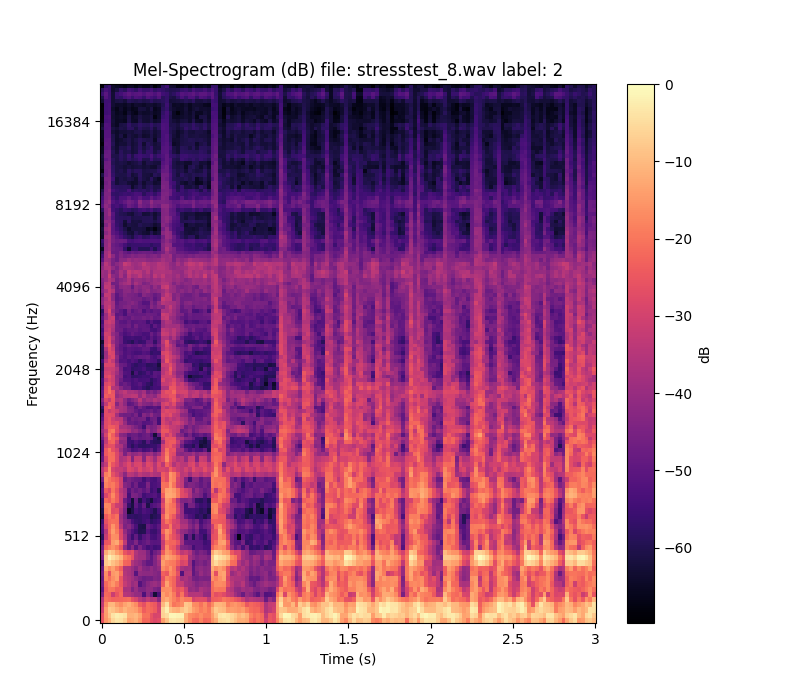

In [49]:
# Plot the mel spectrogram for broken case
Sound.plotspec(test_spec[331], fs, 1024, test_files[331], test_label[331])

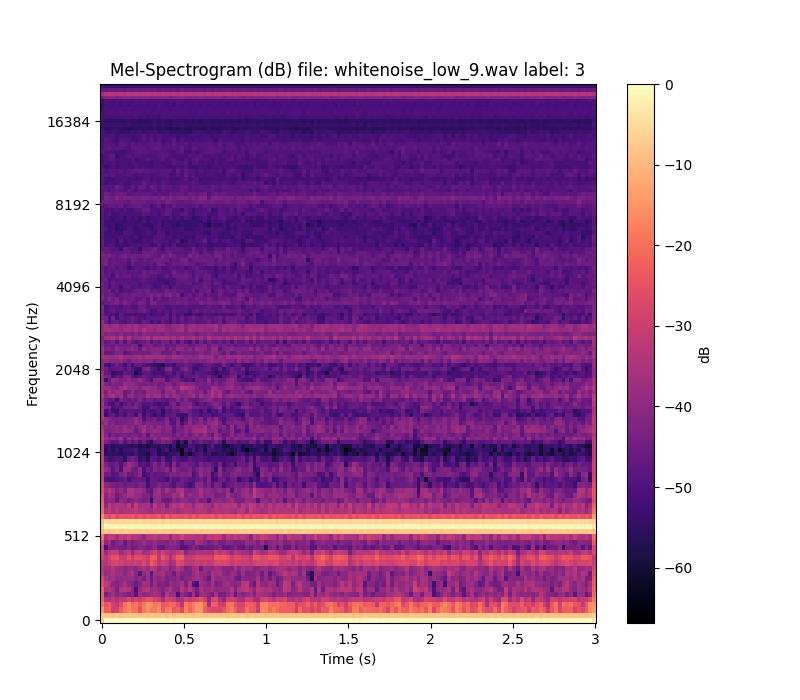

In [50]:
# Plot the mel spectrogram for heavyload case
Sound.plotspec(test_spec[550], fs, 1024, test_files[550], test_label[550])

In [51]:
# PREPARE TRAINING DATA FOR MODEL

In [52]:
# Normalize rms training data
train_rmsnorm = normalize(train_rms.reshape(1,-1), norm='max')
# Make random selection among all
train_rmsnorm_shuff, train_label_rms_shuff, train_file_rms_shuff = shuffle(train_rmsnorm[0], train_label, train_file)#, random_state=123)
print(train_rmsnorm.shape)
print(train_rmsnorm[0][sl])
print(train_rmsnorm_shuff[sl])
print(train_label[sl])
print(train_label_rms_shuff[sl])
print(train_file[sl])
print(train_file_rms_shuff[sl])


(1, 357)
[0.20711661 0.21557728]
[0.35566243 0.21509183]
[2 2]
[1 2]
['pure_89.wav', 'pure_2.wav']
['pure_37.wav', 'pure_14.wav']


In [53]:
# Reshape the spectogram array to 1D
train_spec1d = train_spec.reshape(len(train_spec), 128*130)
# Normalize spectrogram data
train_spec1dnorm = normalize(train_spec1d, norm='max')
# Make random selection among all
train_spec1dnorm_shuff, train_label_spec_shuff, train_file_spec_shuff = shuffle(train_spec1dnorm, train_label, train_file)#, random_state=123)
print(train_spec1dnorm_shuff.shape)
print(train_spec1dnorm[sl])
print(train_spec1dnorm_shuff[sl])
print(train_label[sl])
print(train_label_spec_shuff[sl])
print(train_file[sl])
print(train_file_spec_shuff[sl])

(357, 16640)
[[-0.24843584 -0.21312936 -0.15407363 ... -0.8760817  -0.76598436
  -0.9137184 ]
 [-0.23593366 -0.26152813 -0.22377905 ... -0.82631874 -0.74925154
  -0.9003624 ]]
[[-0.04528823 -0.00655286 -0.00691354 ... -0.71998215 -0.72185224
  -0.7073244 ]
 [-0.10436007 -0.00541328 -0.00148081 ... -0.75968784 -0.76573247
  -0.7475652 ]]
[2 2]
[3 3]
['pure_89.wav', 'pure_2.wav']
['pure_40.wav', 'pure_110.wav']


In [54]:
# PREPARE TEST DATA FOR MODEL

In [55]:
# Normalize rms test data
test_rmsnorm = normalize(test_rms.reshape(1,-1), norm='max')
print(test_rmsnorm.shape)
print(test_rmsnorm[0][sl2])

(1, 673)
[0.10082905 0.14863141]


In [56]:
# Reshape the spectogram array to 1D
test_spec1d = test_spec.reshape(len(test_spec), 128*130)
print(test_spec1d.shape)
print(test_spec1d[sl2])
# Normalize spectrogram data
test_spec1dnorm = normalize(test_spec1d, norm='max')
print(test_spec1dnorm.shape)
print(test_spec1dnorm[sl2])

(673, 16640)
[[-20.920479 -14.786171 -13.94989  ... -41.57554  -41.666733 -43.22454 ]
 [-32.89794  -17.327301 -19.045723 ... -48.671333 -48.29545  -50.57824 ]]
(673, 16640)
[[-0.36013252 -0.25453436 -0.24013834 ... -0.71569604 -0.7172659
  -0.7440825 ]
 [-0.52922314 -0.27874112 -0.30638504 ... -0.7829668  -0.77692
  -0.81364286]]


In [57]:
# TRAINING MODEL 

In [58]:
#Imports
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import metrics as ms
from sklearn.metrics import accuracy_score, classification_report

In [59]:
# Train and test mel spectorgram with KNN classifier

In [60]:
# Define and train the model for mel spectrogram
knn_model_mel = KNeighborsClassifier(n_neighbors=3)
knn_model_mel.fit(train_spec1dnorm_shuff, train_label_spec_shuff) 

KNeighborsClassifier(n_neighbors=3)

In [61]:
# Cross validation predict (with an untrained model)
knn_model2 = KNeighborsClassifier(n_neighbors=3)
y_train_pred_knn = cross_val_predict(knn_model2, train_spec1dnorm_shuff, train_label_spec_shuff, cv=3)
cm = confusion_matrix(train_label_spec_shuff, y_train_pred_knn)
cm

array([[105,   0,   0],
       [  0, 124,   0],
       [  0,   0, 128]], dtype=int64)

In [62]:
# Check accuracy
y_pred_knn_mel = knn_model_mel.predict(test_spec1dnorm)
print("Accuracy of model = %2f%%" % (accuracy_score(test_label, y_pred_knn_mel)*100))


Accuracy of model = 96.285290%


In [63]:
print(classification_report(test_label, y_pred_knn_mel, target_names=['good', 'broken', 'heavyload']))

              precision    recall  f1-score   support

        good       1.00      1.00      1.00       223
      broken       1.00      0.89      0.94       221
   heavyload       0.90      1.00      0.95       229

    accuracy                           0.96       673
   macro avg       0.97      0.96      0.96       673
weighted avg       0.97      0.96      0.96       673



In [64]:
# Test with the random samples
#np.random.seed(123)
n_test=400
idxs_test = np.random.choice(len(test_spec1dnorm), n_test, replace=False)
idxs_test
y_samples_knn_mel = knn_model_mel.predict(test_spec1dnorm[idxs_test])
print('Predicted with KNN: \n', y_samples_knn_mel, '\nReal label: \n', test_label[idxs_test])
print('all equal? ' , np.array_equal(y_samples_knn_mel, test_label[idxs_test]))
print('Fraction equal: ', np.sum(y_samples_knn_mel==test_label[idxs_test])/len(test_label[idxs_test]))

Predicted with KNN: 
 [1 1 3 3 1 3 1 1 1 1 1 3 3 3 3 2 1 3 1 3 1 2 1 3 2 2 3 1 1 1 3 1 1 2 2 3 3
 2 3 2 1 1 3 2 1 3 3 3 2 2 2 1 3 2 1 2 2 2 3 2 2 3 3 3 2 2 1 3 1 3 2 1 3 1
 3 1 3 1 3 3 2 2 1 1 3 3 3 3 2 3 2 3 3 2 3 2 3 1 1 3 3 3 3 2 3 3 3 3 1 3 1
 3 2 1 3 3 2 2 1 2 2 1 1 1 3 1 3 1 3 3 3 1 2 1 2 3 1 3 1 2 3 3 3 3 2 1 2 3
 2 3 1 2 2 2 3 1 1 1 3 3 2 3 2 3 3 3 1 2 1 3 2 3 1 3 1 1 1 1 3 3 3 1 1 1 2
 2 3 1 2 3 1 3 3 3 1 3 1 3 3 3 1 1 3 3 2 1 2 1 1 3 1 3 3 2 2 3 3 2 3 2 1 2
 2 1 3 2 2 1 1 2 1 1 2 2 2 2 1 1 2 1 1 2 2 1 3 2 2 1 3 2 2 1 3 1 2 3 2 3 2
 3 1 3 3 2 2 1 3 3 2 1 2 1 2 2 1 3 3 2 1 2 3 2 1 2 2 1 2 1 3 3 2 2 1 2 2 3
 3 2 1 1 1 1 2 3 1 1 2 1 3 1 1 2 1 3 1 3 1 3 2 3 3 2 1 2 1 3 2 1 3 1 2 3 3
 2 2 2 3 3 2 3 3 1 3 3 3 3 3 2 1 1 3 1 3 3 3 1 2 2 2 2 3 1 3 3 2 3 3 2 2 3
 3 3 1 2 1 3 1 2 3 2 3 1 1 2 1 3 1 2 1 3 3 2 3 1 2 1 3 2 3 2] 
Real label: 
 [1 1 3 3 1 3 1 1 1 1 1 3 3 3 3 2 1 3 1 3 1 2 1 2 2 2 3 1 1 1 3 1 1 2 2 3 3
 2 3 2 1 1 3 2 1 3 3 3 2 2 2 1 3 2 1 2 2 2 3 2 2 3 3 3 2 2 1 3 1 3 2 1 3 1
 

In [65]:
# Train and test using RMS with KNN classifier

In [66]:
# # Define and train the model for RMS
knn_model_rms = KNeighborsClassifier(n_neighbors=3)
knn_model_rms.fit(train_rmsnorm_shuff.reshape(-1,1), train_label_rms_shuff) 

KNeighborsClassifier(n_neighbors=3)

In [67]:
# Cross validation predict (with an untrained model)
knn_model3 = KNeighborsClassifier(n_neighbors=3)
y_train_pred_knn_rms = cross_val_predict(knn_model3, train_rmsnorm_shuff.reshape(-1,1), train_label_rms_shuff, cv=2)
cm = confusion_matrix(train_label_rms_shuff, y_train_pred_knn_rms)
cm

array([[105,   0,   0],
       [  0, 124,   0],
       [  0,   0, 128]], dtype=int64)

In [68]:
# Check accuracy
y_pred_knn_rms = knn_model_rms.predict(test_rmsnorm.reshape(-1,1))
print("Accuracy of model = %2f%%" % (accuracy_score(test_label, y_pred_knn_rms)*100))

Accuracy of model = 31.649331%


In [69]:
print(classification_report(test_label, y_pred_knn_rms, target_names=['good', 'broken', 'heavyload']))

              precision    recall  f1-score   support

        good       0.03      0.03      0.03       223
      broken       0.49      0.92      0.64       221
   heavyload       0.17      0.01      0.02       229

    accuracy                           0.32       673
   macro avg       0.23      0.32      0.23       673
weighted avg       0.23      0.32      0.23       673



In [70]:
# Test with the same random samples as previously
y_samples_knn_rms = knn_model_rms.predict(test_rmsnorm.reshape(-1,1)[idxs_test])
print('Predicted with KNN: \n', y_samples_knn_rms, '\nReal label: \n', test_label[idxs_test])
print('all equal? ' , np.array_equal(y_samples_knn_rms, test_label[idxs_test]))
print('Fraction equal: ', np.sum(y_samples_knn_rms==test_label[idxs_test])/len(test_label[idxs_test]))

Predicted with KNN: 
 [2 2 1 1 2 1 2 2 2 2 2 1 1 1 1 2 2 1 2 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 1 1
 2 1 2 2 2 1 2 3 1 1 1 1 2 2 2 1 2 2 2 2 2 1 1 2 1 1 1 2 2 2 1 2 1 2 1 1 1
 1 2 1 2 1 1 2 2 2 2 1 1 1 1 2 2 2 1 1 2 1 2 1 2 2 2 1 1 1 2 1 2 1 1 2 1 2
 2 3 2 1 1 2 1 2 2 3 2 2 2 3 2 1 2 2 1 1 2 2 2 2 1 2 2 2 2 1 1 1 1 2 2 2 1
 2 1 2 2 2 2 1 2 2 2 1 1 2 1 2 1 1 1 2 2 2 1 2 1 1 1 2 2 2 2 1 1 1 2 2 2 2
 2 1 2 2 1 2 1 1 1 2 1 2 1 1 1 2 2 1 1 3 2 2 2 2 1 2 1 2 2 2 1 1 2 3 2 2 2
 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2 1 2 1 2
 1 2 1 1 2 2 2 1 1 2 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2
 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 3 1 2 2 1 2 2 1 1
 2 2 2 1 1 2 1 1 2 1 1 1 1 1 2 2 2 1 2 2 1 1 2 2 2 2 2 1 2 1 1 2 1 1 2 2 1
 1 1 2 2 2 2 2 2 1 1 1 2 2 2 2 1 2 2 2 1 1 1 1 2 2 2 1 2 2 2] 
Real label: 
 [1 1 3 3 1 3 1 1 1 1 1 3 3 3 3 2 1 3 1 3 1 2 1 2 2 2 3 1 1 1 3 1 1 2 2 3 3
 2 3 2 1 1 3 2 1 3 3 3 2 2 2 1 3 2 1 2 2 2 3 2 2 3 3 3 2 2 1 3 1 3 2 1 3 1
 

In [71]:
# Train and test mel spectograms with SGD classifier

In [72]:
# Define and train the model for mel spectrogram
sgd_model_mel = SGDClassifier(loss='log_loss', alpha=0.8, max_iter=1000)#, random_state=123
sgd_model_mel.fit(train_spec1dnorm_shuff, train_label_spec_shuff) 

SGDClassifier(alpha=0.8, loss='log_loss')

In [73]:
# Cross validation predict (with an untrained model)
sgd_model2 = SGDClassifier(loss='log_loss', alpha=0.1, max_iter=1000)#, random_state=123)
y_train_pred_sgd_mel = cross_val_predict(sgd_model2, train_spec1dnorm_shuff, train_label_spec_shuff, cv=2)
cm = confusion_matrix(train_label_spec_shuff, y_train_pred_sgd_mel)
cm

array([[105,   0,   0],
       [  0, 124,   0],
       [  0,   0, 128]], dtype=int64)

In [74]:
# Check accuracy
y_pred_sgd_mel =sgd_model_mel.predict(test_spec1dnorm)
print("Accuracy of model = %2f%%" % (accuracy_score(test_label, y_pred_sgd_mel )*100))

Accuracy of model = 98.514116%


In [75]:
print(classification_report(test_label, y_pred_sgd_mel, target_names=['good', 'broken', 'heavyload']))

              precision    recall  f1-score   support

        good       1.00      0.96      0.98       223
      broken       1.00      1.00      1.00       221
   heavyload       0.96      1.00      0.98       229

    accuracy                           0.99       673
   macro avg       0.99      0.99      0.99       673
weighted avg       0.99      0.99      0.99       673



In [76]:
# Test with the random samples
y_samples_sgd_mel = sgd_model_mel.predict(test_spec1dnorm[idxs_test])
print('Predicted with SDG: \n', y_samples_sgd_mel, '\nReal label: \n', test_label[idxs_test])
print('all equal? ' , np.array_equal(y_samples_sgd_mel, test_label[idxs_test]))
print('Fraction equal: ', np.sum(y_samples_sgd_mel==test_label[idxs_test])/len(test_label[idxs_test]))

Predicted with SDG: 
 [1 1 3 3 1 3 1 1 1 1 1 3 3 3 3 2 1 3 1 3 1 2 1 2 2 2 3 1 1 1 3 1 1 2 2 3 3
 2 3 2 1 1 3 2 3 3 3 3 2 2 2 1 3 2 1 2 2 2 3 2 2 3 3 3 2 2 1 3 1 3 2 3 3 3
 3 1 3 1 3 3 2 2 1 1 3 3 3 3 2 2 2 3 3 2 3 2 3 1 1 2 3 3 3 2 3 2 3 3 1 3 1
 2 2 1 3 3 2 2 1 2 2 1 1 1 3 1 3 1 2 3 3 1 2 1 2 3 1 2 1 2 3 3 3 3 2 1 2 3
 2 3 1 2 2 2 3 1 1 1 3 3 2 3 2 3 2 3 1 2 1 3 2 3 1 3 1 1 1 1 3 3 3 1 1 1 2
 2 3 1 2 3 1 3 3 3 1 3 1 3 3 3 1 1 3 3 2 1 2 1 1 3 1 3 2 2 2 3 3 2 3 2 1 2
 2 1 3 2 2 1 1 2 1 1 2 2 2 2 1 1 2 1 1 2 2 1 3 2 2 1 3 2 2 1 3 1 2 3 2 3 2
 3 1 3 3 2 2 1 3 3 2 1 2 1 2 2 1 3 3 2 1 2 3 2 1 2 2 1 2 1 3 3 2 2 1 2 2 2
 3 2 1 1 1 1 2 3 1 1 2 1 2 1 1 2 1 3 1 3 1 3 2 2 3 2 1 2 3 3 2 1 3 1 2 3 3
 2 2 2 3 3 2 3 3 1 3 3 3 3 3 2 1 1 3 1 2 3 3 1 2 2 2 2 3 1 3 3 2 3 3 2 2 3
 3 3 1 2 1 2 1 2 3 2 3 1 1 2 1 3 1 2 1 2 3 2 3 1 2 1 3 2 2 2] 
Real label: 
 [1 1 3 3 1 3 1 1 1 1 1 3 3 3 3 2 1 3 1 3 1 2 1 2 2 2 3 1 1 1 3 1 1 2 2 3 3
 2 3 2 1 1 3 2 1 3 3 3 2 2 2 1 3 2 1 2 2 2 3 2 2 3 3 3 2 2 1 3 1 3 2 1 3 1
 

In [77]:
# RMS prediction is not repeated with the SGD as it seem to be a difficult metric

In [78]:
# EXSTRA TEST WITH UNSEEN TEST DATA

# The test dataset is big only 1/3 was used for original test. 
# Now the remaining will be tested on the SGD classifier again

In [79]:
# Define the datasets for testing with links to files, folders and labels
# Labels are defined as numbers 1 = good, 2 = broken and 3 = heavy load
good_test_rest = Dataset(good_files_test_rest, good_folder_test, fs, np.ones(len(good_files_test_rest)).astype(int))
broken_test_rest = Dataset(broken_files_test_rest, broken_folder_test, fs, 2*np.ones(len(broken_files_test_rest)).astype(int))
heavyload_test_rest = Dataset(heavyload_files_test_rest, heavyload_folder_test, fs, 3*np.ones(len(heavyload_files_test_rest)).astype(int))

In [80]:
# Combine the testing data sets and calculate sound arrays
data_test_rest = Calculate([good_test_rest, broken_test_rest, heavyload_test_rest])

In [81]:
# Calculate the mel spectrogram for test data
test_spec_rest, test_label_rest, test_files_rest = data_test_rest.calcspec()
print(test_spec_rest.shape)
print(test_spec_rest[sl2])
print(test_label_rest[sl2])
print(test_files_rest[sl2])

(1348, 128, 130)
[[[-20.530205  -16.077065  -17.92067   ... -16.985428  -14.223267
   -16.517006 ]
  [-20.75354   -18.00978   -21.617218  ... -19.388115  -12.928658
   -16.432259 ]
  [-22.830948  -14.9807205 -14.277832  ... -12.333511   -7.073616
   -10.883652 ]
  ...
  [-22.56392   -19.507057  -19.65635   ... -19.637932  -19.570648
   -20.739555 ]
  [-34.55728   -32.19435   -32.060966  ... -32.392662  -31.763718
   -34.145317 ]
  [-41.547096  -41.383392  -40.972458  ... -41.143913  -40.989784
   -43.714424 ]]

 [[-32.657715  -36.574715  -37.48938   ... -31.95716   -29.613564
   -31.491379 ]
  [-26.500694  -30.539215  -34.32161   ... -24.065956  -23.944183
   -24.073341 ]
  [-25.232635  -31.867027  -24.974464  ... -16.717003  -24.27253
   -20.248299 ]
  ...
  [-39.572914  -36.580956  -37.0139    ... -37.031136  -36.889633
   -37.83938  ]
  [-47.23014   -44.069794  -44.30712   ... -44.316597  -44.324028
   -44.85396  ]
  [-58.272537  -55.946953  -55.284515  ... -56.130142  -55.80754
   

c:\python\IIA1420\assignment2\sound.py:91: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 7))


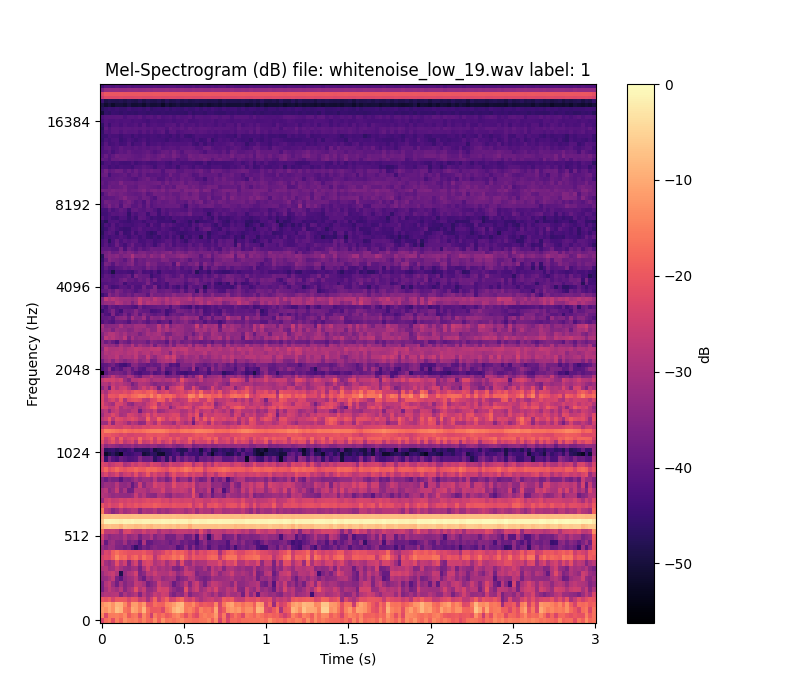

In [82]:
# Plot first mel spectrogram for good case
Sound.plotspec(test_spec_rest[43], fs, 1024, test_files_rest[43], test_label_rest[43])

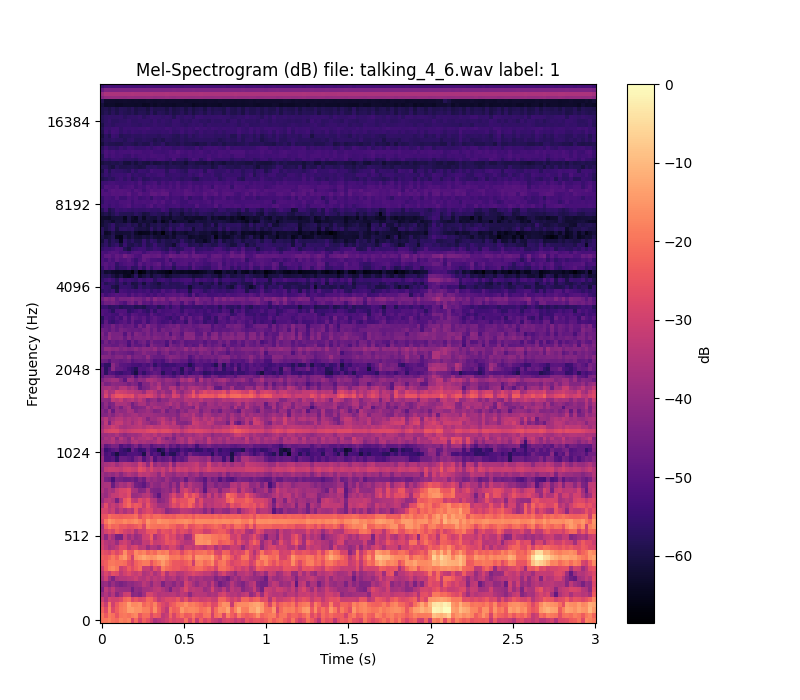

In [83]:
# Plot the mel spectrogram for broken case
Sound.plotspec(test_spec_rest[331], fs, 1024, test_files_rest[331], test_label_rest[331])

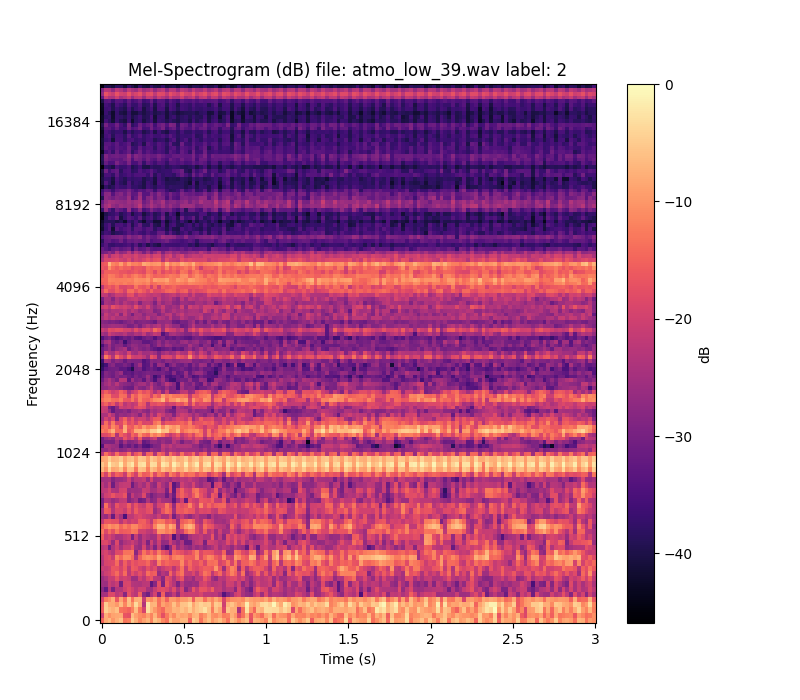

In [84]:
# Plot the mel spectrogram for heavyload case
Sound.plotspec(test_spec_rest[550], fs, 1024, test_files_rest[550], test_label_rest[550])

In [85]:
# Reshape the spectogram array to 1D
test_spec1d_rest = test_spec_rest.reshape(len(test_spec_rest), 128*130)
print(test_spec1d_rest.shape)
print(test_spec1d_rest[sl2])
# Normalize spectrogram data
test_spec1dnorm_rest = normalize(test_spec1d_rest, norm='max')
print(test_spec1dnorm_rest.shape)
print(test_spec1dnorm_rest[sl2])

(1348, 16640)
[[-20.530205 -16.077065 -17.92067  ... -41.143913 -40.989784 -43.714424]
 [-32.657715 -36.574715 -37.48938  ... -56.130142 -55.80754  -54.521896]]
(1348, 16640)
[[-0.3738402  -0.29275176 -0.32632247 ... -0.749201   -0.7463944
  -0.7960081 ]
 [-0.4634809  -0.5190713  -0.5320523  ... -0.79660344 -0.792025
  -0.7737791 ]]


In [86]:
# Check results again using same trained SGD classifier as for the first part of test set
# It is now fed with the remaining data from test set, that was splitted in the beginning.
y_pred_sgd_mel_rest = sgd_model_mel.predict(test_spec1dnorm_rest)
print("Accuracy of model = %2f%%" % (accuracy_score(test_label_rest, y_pred_sgd_mel_rest)*100))

Accuracy of model = 98.516320%


In [87]:
print(classification_report(test_label_rest, y_pred_sgd_mel_rest, target_names=['good', 'broken', 'heavyload']))

              precision    recall  f1-score   support

        good       1.00      0.96      0.98       446
      broken       1.00      1.00      1.00       444
   heavyload       0.96      1.00      0.98       458

    accuracy                           0.99      1348
   macro avg       0.99      0.99      0.99      1348
weighted avg       0.99      0.99      0.99      1348



In [88]:
# Test with the random samples
n_test_rest=500
idxs_test_rest = np.random.choice(len(test_spec1dnorm_rest), n_test_rest, replace=False)
idxs_test_rest
y_samples_sgd_mel_rest = sgd_model_mel.predict(test_spec1dnorm_rest[idxs_test_rest])
print('Predicted with SDG: \n', y_samples_sgd_mel_rest, '\nReal label: \n', test_label_rest[idxs_test_rest])
print('all equal? ' , np.array_equal(y_samples_sgd_mel_rest, test_label_rest[idxs_test_rest]))
print('Fraction equal: ', np.sum(y_samples_sgd_mel_rest==test_label_rest[idxs_test_rest])/len(test_label_rest[idxs_test_rest]))

Predicted with SDG: 
 [3 1 2 1 1 3 3 2 2 1 2 3 2 2 3 1 2 3 2 2 2 1 3 3 2 2 2 3 3 3 1 1 3 3 3 2 3
 1 3 1 1 1 2 1 3 3 3 1 3 1 1 3 3 3 2 1 2 2 3 3 3 3 3 1 2 2 2 1 2 3 3 2 2 3
 2 3 2 3 3 1 1 2 1 1 3 2 1 2 1 1 1 3 1 3 3 1 2 3 1 1 3 2 2 3 1 3 1 3 1 1 3
 2 1 1 2 2 2 2 1 2 3 1 1 3 2 2 1 3 1 3 1 2 3 2 3 3 2 2 2 3 3 1 3 1 2 1 2 3
 1 2 3 2 1 2 3 3 1 1 1 2 3 3 1 2 2 3 3 1 1 2 1 1 3 2 1 1 3 1 1 1 3 1 3 2 1
 2 3 2 2 2 3 1 3 2 2 3 2 3 2 2 3 2 3 2 2 1 3 2 2 2 1 1 1 1 3 1 1 3 1 2 2 2
 1 2 2 2 2 1 1 1 1 3 2 2 2 2 1 2 2 3 1 3 3 3 3 3 2 3 3 1 2 2 2 1 1 1 2 1 1
 2 1 1 3 3 1 3 1 3 3 3 1 3 2 3 1 3 2 2 1 1 1 2 2 1 2 1 1 3 3 2 2 1 3 3 1 2
 1 1 1 2 1 1 2 3 1 1 3 3 1 3 2 2 3 2 3 1 2 1 3 1 3 2 3 2 2 1 2 3 1 2 1 1 3
 3 2 2 1 2 2 3 1 1 2 2 1 2 2 2 3 3 1 1 3 2 3 3 1 3 3 2 3 2 1 2 1 1 2 2 3 3
 1 1 2 2 3 1 1 2 3 2 2 1 1 1 2 1 3 2 1 2 3 1 1 1 3 2 2 2 3 1 3 3 2 1 3 3 3
 1 2 2 3 1 3 3 1 2 2 2 3 2 3 1 2 1 2 2 2 1 2 1 3 3 1 1 3 2 2 1 1 2 2 2 1 2
 3 2 3 3 2 3 2 3 2 2 3 1 3 3 1 3 2 2 3 1 1 1 2 2 2 1 3 2 2 2 3 1 1 3 1 3 2
 3 